# DATA3406 Week8 mini-assignment

## Part 1:

In [1]:
from __future__ import print_function

import pandas as pd
pd.__version__

'0.24.2'

1. "pd.read_csv()" is used to read .csv data set, and ".describe()" can load some example figure of the data set. Plus, ".head()" is more briefly and simpler.

In [2]:
california_housing_dataframe = pd.read_csv("https://download.mlcc.google.com/mledu-datasets/california_housing_train.csv", sep=",")


In [3]:
california_housing_dataframe.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0


2. "DataFrame" is used to accessing data. It is similar to Python dict/list operations.

3. "NumPy" is a toolkit which is used to scientific computing like "log" with "np.log()"

4. ".reindex()" can manually reorder rows.

5. "matplotlib.pyplot", "axes3d", "altair", "plotly.offline", "plotly.graph_objs" and etc are usaful package for building charts.

## Part 2:

This data set is provided by https://www.covid19data.com.au/. 

Its source link is https://github.com/M3IT/COVID-19_Data.

### Accessing Data

In [4]:
# Accessing data
df = pd.read_csv("https://raw.githubusercontent.com/M3IT/COVID-19_Data/master/Data/COVID_AU_national.csv")
df.head()

,date,confirmed,confirmed_cum,deaths,deaths_cum,tests,tests_cum,positives,positives_cum,recovered,recovered_cum,hosp,hosp_cum,icu,icu_cum,vent,vent_cum
0,2020-01-25,4,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2020-01-26,0,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,2020-01-27,1,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,2020-01-28,0,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,2020-01-29,4,9,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [5]:
# Drop irrelevant columns 
to_drop = ['tests_cum',
          'tests',
          'positives',
          'positives_cum',
          'hosp',
          'hosp_cum',
          'icu',
          'icu_cum',
          'vent',
          'vent_cum']
df.drop(to_drop, inplace=True, axis=1)

In [6]:
# Rename columns
ndf = df.rename(columns={"date":"Date","confirmed":"Daily Confirmed","confirmed_cum":"Confirmed Case","deaths":"Daily Deaths","deaths_cum":"Total Death","recovered":"Daily Recovery","recovered_cum":"Total Recovery"})

In [7]:
# Show the tail of data set
ndf.tail()

,Date,Daily Confirmed,Confirmed Case,Daily Deaths,Total Death,Daily Recovery,Total Recovery
292,2020-11-12,13,27698,0,907,5,25108
293,2020-11-13,5,27703,0,907,6,25114
294,2020-11-14,8,27711,0,907,5,25119
295,2020-11-15,17,27728,0,907,6,25125
296,2020-11-16,22,27750,0,907,4,25129


According to confirmed case and total death, we can caculate Case fatality ratio (CFR) of COVID-19 in Australia.

In [8]:
# Caculate CFR before 10/20/2000.
(905/27430) * 100

3.299307327743347

Plus the total recovery number, we can caculate the Case Fatality ratio(CFR) during an ongoing epidemic of COVID-19 in Australia.

In [9]:
# Caculate CFR during an ongoing epidemic before 10/20/2000
(905/(905+24786)) * 100

3.5226343855824993

As we can see, the CFR is around 3.30%, and CFR during an ongoing epidemic is slightly higher which is around 3.52%.

To showing the daily increasement, I choose line plots to presenting this.

In [10]:
import matplotlib.pyplot as plt

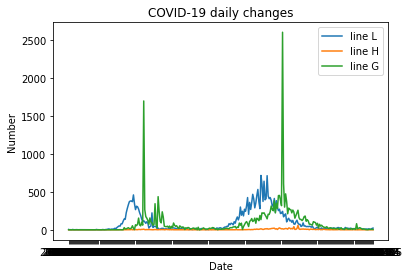

In [11]:
plt.plot(df.date, df.confirmed, label="line L")
plt.plot(df.date, df.deaths, label="line H")
plt.plot(df.date, df.recovered, label="line G")
plt.plot()

plt.xlabel("Date")
plt.ylabel("Number")
plt.title("COVID-19 daily changes")
plt.legend()
plt.show()